In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('entities.csv')

In [3]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [5]:
columns_to_keep= ['property_id', 'property_type', 'location', 'city', 'province_name',
                   'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'Total_Area', 'price']
df = df[columns_to_keep]


In [6]:
df

,property_id,property_type,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,Total_Area,price
0,237062,Flat,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,1089.004,10000000
1,346905,Flat,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,15246.056,6900000
2,386513,House,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2178.008,16500000
3,656161,House,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,10890.000,43500000
4,841645,House,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2178.008,7000000
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,House,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,26136.096,26500000
168442,17355249,House,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2178.008,12500000
168443,17355250,House,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,26136.096,27000000
168444,17355251,House,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,21235.578,11000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   property_type  168446 non-null  object 
 2   location       168446 non-null  object 
 3   city           168446 non-null  object 
 4   province_name  168446 non-null  object 
 5   latitude       168446 non-null  float64
 6   longitude      168446 non-null  float64
 7   baths          168446 non-null  int64  
 8   purpose        168446 non-null  object 
 9   bedrooms       168446 non-null  int64  
 10  Total_Area     168446 non-null  float64
 11  price          168446 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 15.4+ MB


In [8]:
df.isnull().sum()

property_id      0
property_type    0
location         0
city             0
province_name    0
latitude         0
longitude        0
baths            0
purpose          0
bedrooms         0
Total_Area       0
price            0
dtype: int64

In [9]:
gadap_town = df[(df['property_type']=='House') & (df['location'] == 'Gadap Town' ) & (df['purpose'] == 'For Sale')]

<Axes: xlabel='Total_Area', ylabel='price'>

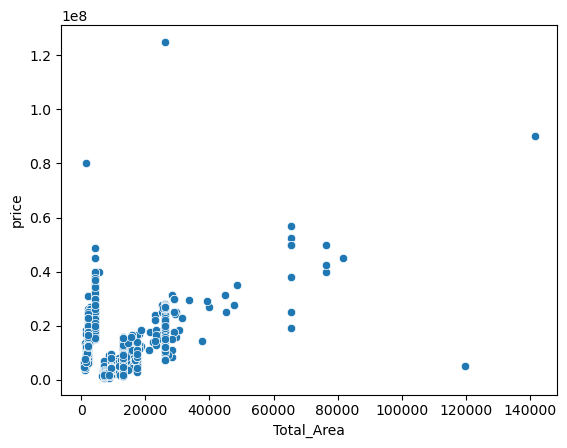

In [10]:
sns.scatterplot(data=gadap_town,x='Total_Area',y='price')

In [11]:
def remove_outliers(df, columns):
    """
    Remove outliers from specified numeric columns in a DataFrame using the interquartile range method.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    columns (list of str): The list of column names in which outliers are to be removed.
    
    Returns:
    DataFrame: The DataFrame with outliers removed.
    """
    # Filter out non-numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    
    # Intersection of specified columns and numeric columns
    columns_to_check = list(set(numeric_columns) & set(columns))
    
    # Dictionary to store boolean masks for outlier detection
    outlier_masks = {}
    
    # Calculate the first quartile (Q1) and third quartile (Q3) for each specified column
    for column in columns_to_check:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Create boolean mask for outliers
        outlier_masks[column] = (df[column] < lower_bound) | (df[column] > upper_bound)
    
    # Combine boolean masks for all specified columns
    combined_mask = pd.concat(outlier_masks.values(), axis=1).any(axis=1)
    
    # Remove rows containing outliers
    df_filtered = df[~combined_mask]
    
    return df_filtered

In [12]:
g_town = remove_outliers(gadap_town,gadap_town.columns)

In [13]:
g_town = g_town[g_town['Total_Area']>5000]

In [14]:
g_town_numeric = g_town.select_dtypes(include = [np.number])

<Axes: >

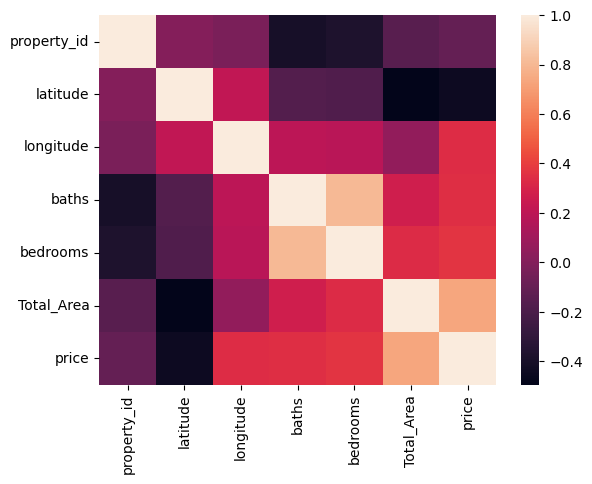

In [15]:
sns.heatmap(g_town_numeric.corr())

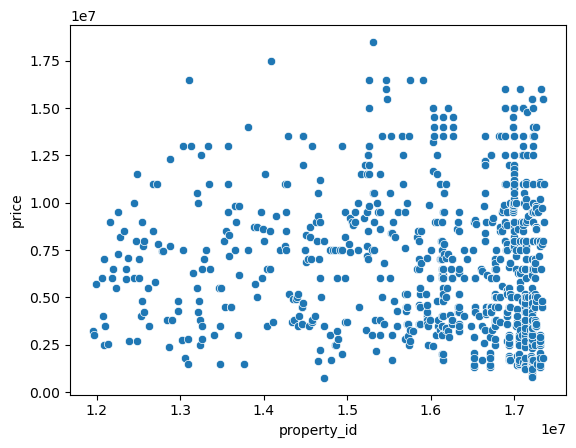

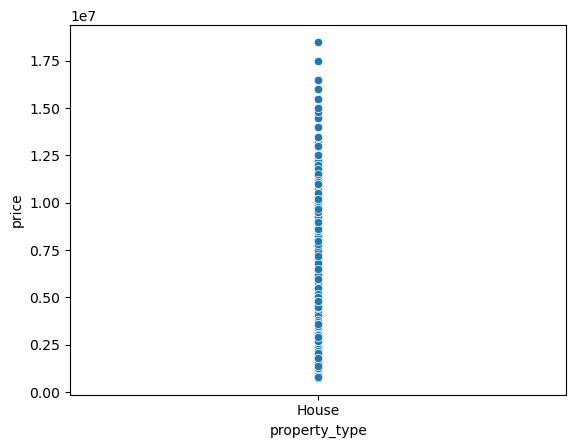

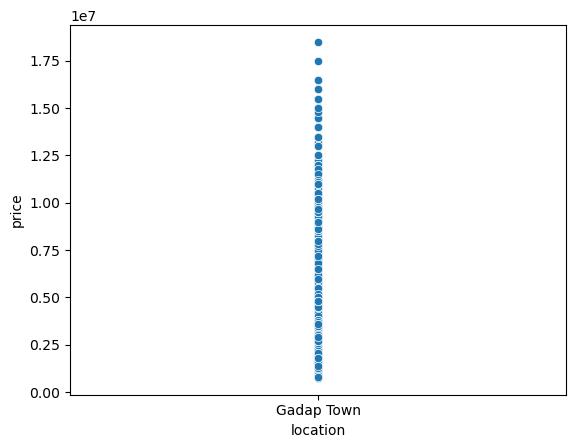

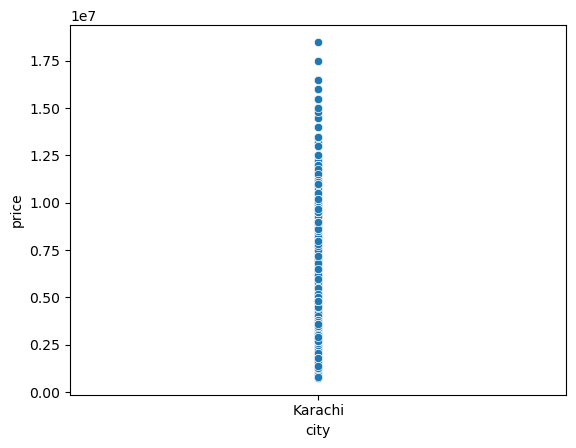

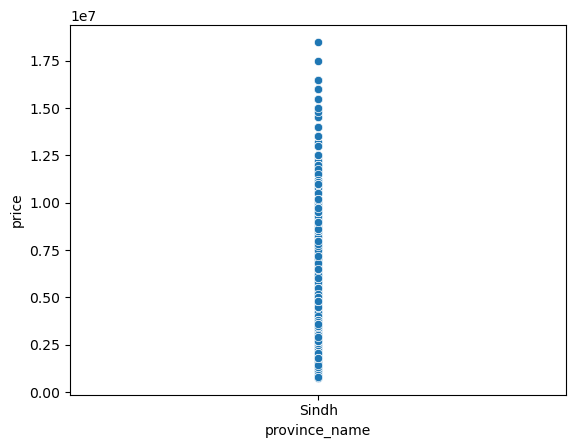

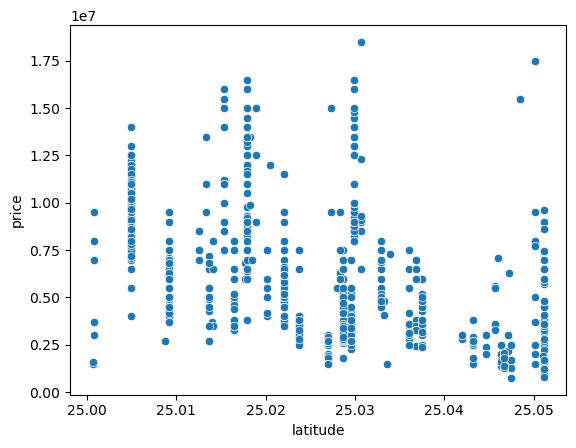

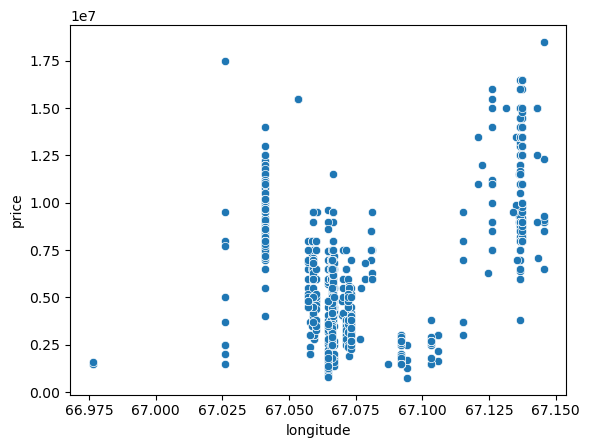

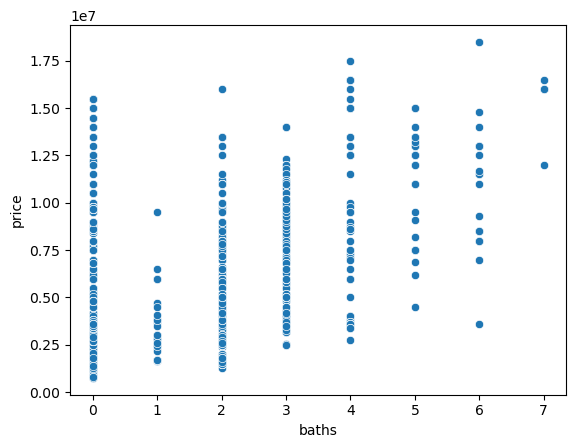

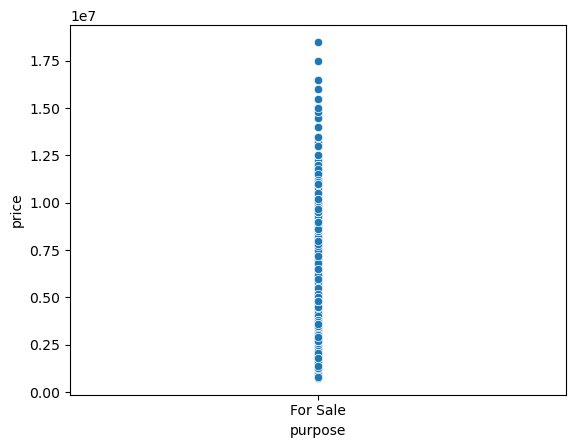

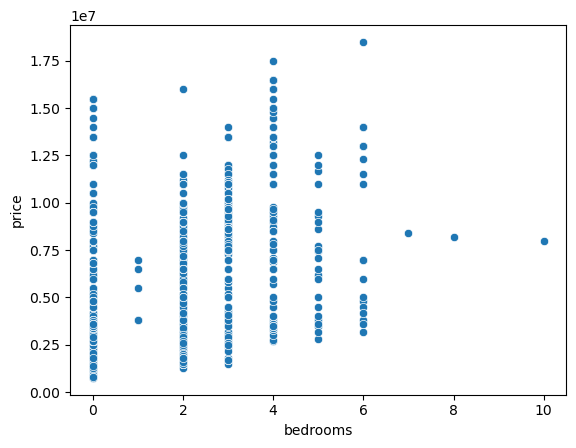

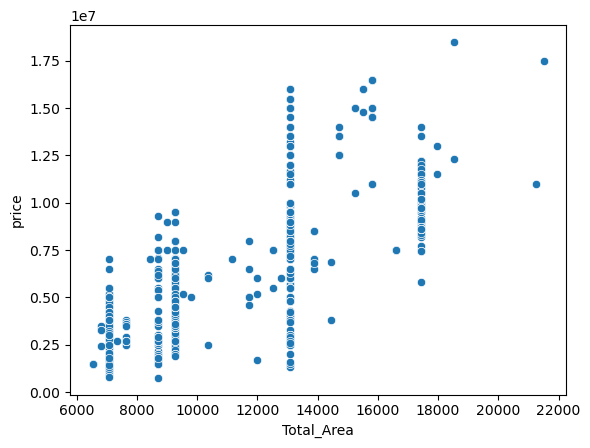

In [16]:
for col in g_town.columns:
    if col != 'price':
        sns.scatterplot(data=g_town,x=col,y='price')
        plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()

In [18]:
X=g_town[['baths','bedrooms','Total_Area']]
y = g_town[['price']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 5373614550061.537


In [22]:
 #Calculate R^2 score
r2_score = r2_score(y_test, y_pred)

print("R^2 Score:", r2_score)

R^2 Score: 0.5651179070718566


### Preparing for model

In [23]:
df.columns

Index(['property_id', 'property_type', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'Total_Area',
       'price'],
      dtype='object')

In [24]:
col = ['property_type', 'city' , 'baths', 'purpose', 'bedrooms', 'Total_Area',
       'price']
df_train = df[col]

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
to_encode_col = ['property_type', 'city','purpose']

In [28]:
for col in to_encode_col:
    df_train.loc[:,col] = label_encoder.fit_transform(df_train[col])

<Axes: >

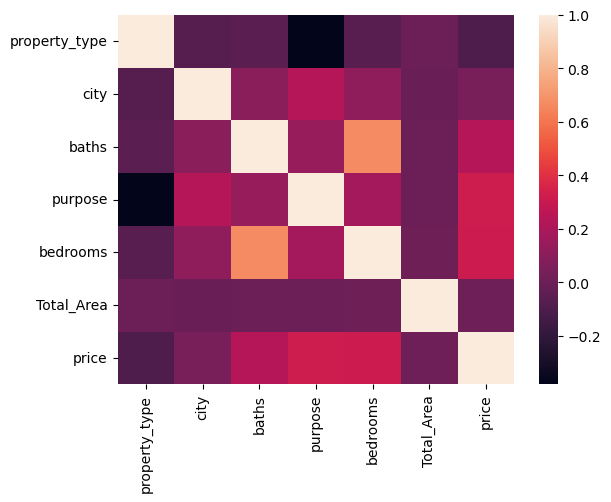

In [29]:
sns.heatmap(df_train.corr())

In [30]:
y = df_train[['price']]
X = df_train.drop(columns = ['price'])

In [31]:
lin_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_model.fit(X_train, y_train)

LinearRegression()

In [32]:
from sklearn.metrics import r2_score

# Calculate R^2 score
y_pred = lin_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)


R^2 Score: 0.1749948639726019


In [33]:
X_test

,property_type,city,baths,purpose,bedrooms,Total_Area
49309,2,2,6,1,6,5445.000
42561,2,2,3,0,3,25319.343
1398,2,3,5,1,4,2722.510
81279,2,4,0,1,4,544.502
18347,2,1,6,0,7,2722.510
...,...,...,...,...,...,...
73327,2,3,6,1,6,5445.000
157728,2,3,6,1,5,5445.000
156404,2,3,6,1,5,10890.000
129725,6,2,3,0,3,5445.000


In [34]:
y_pred

array([[38659328.00585303],
       [  951897.58287273],
       [27024972.98520306],
       ...,
       [32002561.68068386],
       [ 3916650.64514763],
       [17938640.14522685]])

In [35]:
y_test

,price
49309,87500000
42561,55000
1398,21800000
81279,6500000
18347,75000
...,...
73327,38000000
157728,59000000
156404,175000000
129725,140000


In [36]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [37]:
y_pred_rf = random_forest_model.predict(X_test)


In [38]:
r2_rf = r2_score(y_test, y_pred_rf)

In [39]:
print(f"R-squared: {r2_rf}")

R-squared: 0.7754994071481848


In [40]:
y_test

,price
49309,87500000
42561,55000
1398,21800000
81279,6500000
18347,75000
...,...
73327,38000000
157728,59000000
156404,175000000
129725,140000


In [41]:
pd.DataFrame({'price pred': y_pred_rf})

,price pred
0,1.080490e+08
1,4.890811e+04
2,2.599075e+07
3,4.212695e+06
4,7.414034e+04
...,...
33685,4.379151e+07
33686,4.735351e+07
33687,1.244795e+08
33688,1.183274e+05


In [43]:
.score(X_test,y_test)

0.1749948639726019